<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 7

### Problem 0 (3 points)

## Part 1: The Representer Theorem 

### Problem 1.1 (Exam Style)

With the regularization term, the new risk function becomes:
$$
L_T(\mathbf{v^{*}}) = L_T(\mathbf{v}) + \mu \| \mathbf{v} \|^2
$$
where $\mathbf{v^*}$ =  $\begin{pmatrix} \mathbf{w^*} \\ b^* \end{pmatrix}$

We can show that the representer theorem applies to this new risk equation, which proves that $\mathbf{w^*}$ in this equation is a linear combination of the data point in the training set.

We can consider this equation in its generalized form of: 
$$
L_T(\mathbf{w^*}, b^*) = R(\| \mathbf{w} \|) + S(\mathbf{w}^T\mathbf{x_1} + b, \dots, \mathbf{w}^T\mathbf{x_N} + b)
$$
where 
$$R(\| \mathbf{w} \|) = \mu \| \mathbf{w} \|^2 \quad \quad S(\mathbf{w}^T\mathbf{x_1} + b, \dots, \mathbf{w}^T\mathbf{x_N} + b) = L_T(\mathbf{w}, b)$$

Viewing the equation in this form, we can see that the regularized risk function satisfies both conditions necessary for the representer theorem to be applied since $R(\| \mathbf{w} \|)$ is a strictly increaing function and $S(\mathbf{w}^T\mathbf{x_1} + b, \dots, \mathbf{w}^T\mathbf{x_N} + b)$ is a function from $\mathbb{R}^N$ to $\mathbb{R}$.

### Problem 1.2 (Exam Style)

If $R = 0$ (as it does when there is no regularization term), we cannot assert that $R(\| \mathbf{w} \|) < R(\| \mathbf{w^*} \|)$ since $R$ is no longer a strictly increasing function. The second part of the proof that $S(\mathbf{w}^T\mathbf{x_1} + b, \dots, \mathbf{w}^T\mathbf{x_N} + b) = S((\mathbf{w^*})^T\mathbf{x_1} + b, \dots, (\mathbf{w^*})^T\mathbf{x_N} + b)$ still holds, but cannot be used to prove that when $\mathbf{u} \neq 0$, $L(\mathbf{w}, b) < L(\mathbf{w^*}, b)$. Proving this inequality between the losses is necessary to state that $\mathbf{u}$ must be 0 since this inequality cannot exist based on the definition of $\mathbf{w^*}$. Since we no longer prove that $\mathbf{w^*}$ is a linear combination of the vectors $x_1, \dots, x_N$.

## Part 2: Function Convexity and Composition 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


def plot(fct, x, title=None, pair=None, font_size=18):
    y = fct(x)
    plt.figure(figsize=(15, 5), tight_layout=True)
    plt.plot(x, y)
    if pair is not None:
        a, b = pair
        f_pair = fct(a), fct(b)
        plt.plot(pair, f_pair)
    if title is not None:
        plt.title(title, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.show()

### Problem 2.1 (Exam Style)

In [60]:
def f(x):
    return x**2 + x

In [75]:
def g(x):
    return  x**2 - x**3

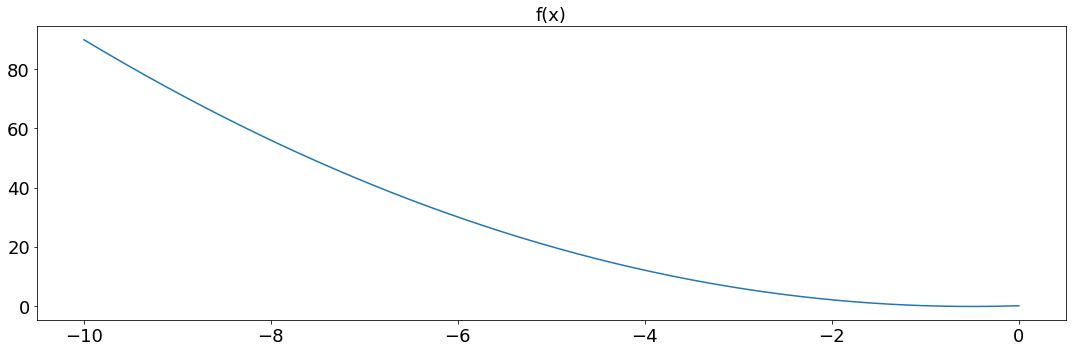

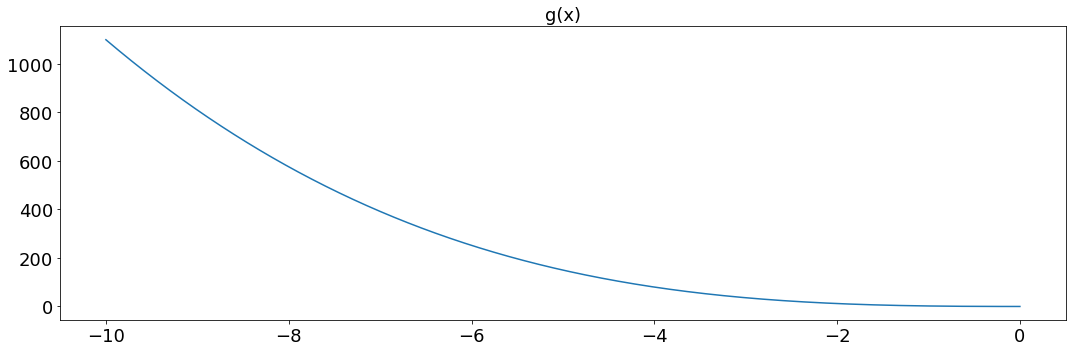

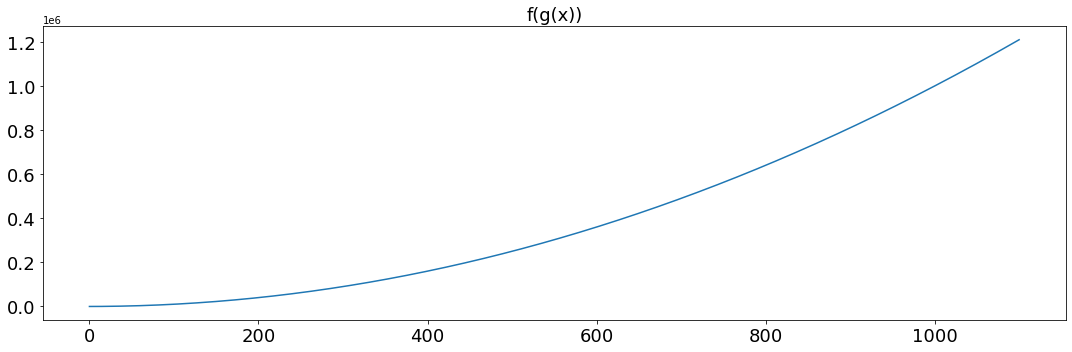

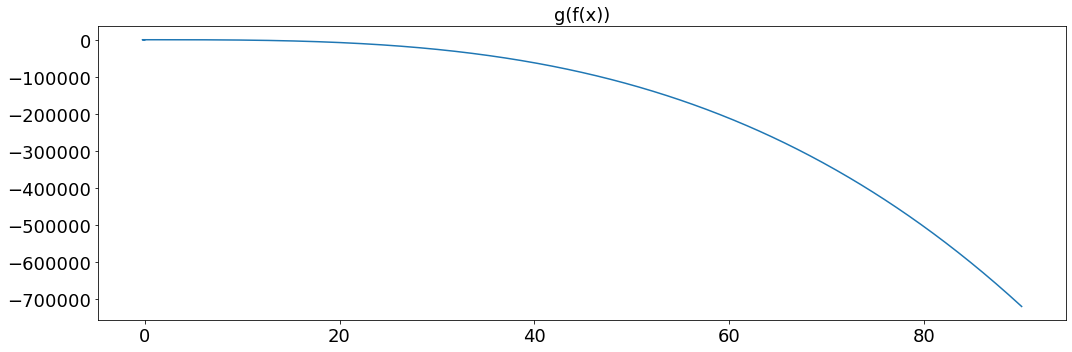

In [77]:
plot(f, np.linspace(-10,0,1000), "f(x)")
plot(g, np.linspace(-10,0,1000), "g(x)")
plot(f,g(np.linspace(-10,0,1000)), "f(g(x))")
plot(g,f(np.linspace(-10,0,1000)), "g(f(x))")

$$
f(x) = x^2 + x \\
g(x) = x^2 - x^3 \\
f(g(x)) = (g(x))^2 + g(x) \\
g(f(x)) = (f(x))^2 - (f(x))^3
$$

$$
f'(x) = 2x + 1 \\
g'(x) = 2x - 3x^2 \\
f'(g(x)) = [2[g(x)] + 1] [g'(x)] = 6x^5 - 6x^4 - 3x^2 + 2x\\
g'(f(x)) = [2[f(x)] - 3[f(x)]^2] [f'(x)] = -6x^5 + 9x^4 + 16x^3 + 7x^2 + x
$$

$$
f''(x) = 2 \\
g''(x) = 2 - 3x \\
f''(g(x)) = 30x^4 - 24x^3 - 6x + 2\\
g''(f(x)) = -30^5 + 36x^3  + 48x^2 + 14x + 1
$$

When considering the domain where $D$ spans $[-10, 0]$ as displayed on the plots above, f''(x) is clearly always above 0 since it is a constant. g''(x) and f''(g(x)) are also shown to be greater than 0 when $x \leq 0$ since all of the even-degree terms have positive coefficients and the odd-degree terms have negative coefficients in both second derivatives, which proves that they are both strongly convex on the given interval. g''(f(x)) however has odd-degree terms with positive coefficients, so it is not guaranteed to be greater than 0 which it clearly isn't based on the shape of the plot above. 

### Problem 2.2 (Exam Style)

The first and second derivatives of the composite function $h$ are evaluated below:

$$
h(x) = g(f(x)) \\
h'(x) = [g'(f(x))][f'(x)] \\
h''(x) = [g'(f(x))][f''(x)] + [f'(x)][g''(f(x))][f'(x)]
$$

We know that both terms in h''(x) will always be greater than 0. In the first term, we know that $g$ is a monotonically increasing function which by definition means that $g'(x) > 0$ and we also know that since $f$ is strongly convex, so $f''(x)$ is always greater than 0. In the second term, it is not guaranteed that $f'(x) > 0$, but since this term is multiplied by itself, it will always be positive. We also know that since $g$ is atleast weakly convex, $g''(x) \geq 0$.

### Problem 2.3 (Exam Style)

The first and second derivatives of the composite function $h$ are the same as in Problem 2.2:

$$
h(x) = g(f(x)) \\
h'(x) = [g'(f(x))][f'(x)] \\
h''(x) = [g'(f(x))][f''(x)] + [f'(x)][g''(f(x))][f'(x)]
$$

Now however, the first term of $h''(x)$ will always evaluate to 0 since f is an affine function with $f''(x) = 0$. Like above, since $f'(x)$ is multiplied by itself in this term, it will always be positive, which makes the second terms value entirely dependent on g''(f(x))

### Problem 2.4 (Exam Style)

$$
f(x) = -x \\
g(x) = x^2 \\
f(g(x)) = -[x^2]
$$

$$
f'(x) = - 1 \\
g'(x) = 2x \\
f'(g(x)) = -2x \\
$$

$$
f''(x) = 0 \\
g''(x) = 2 \\
f''(g(x)) = -2 \\
$$

## Part 3: Support Vector Machines 

In [78]:
from urllib.request import urlretrieve
from os import path as osp


def retrieve(file_name, semester='fall21', course='371d', homework=7):
    if osp.exists(file_name):
        print('Using previously downloaded file {}'.format(file_name))
    else:
        fmt = 'https://www2.cs.duke.edu/courses/{}/compsci{}/homework/{}/{}'
        url = fmt.format(semester, course, homework, file_name)
        urlretrieve(url, file_name)
        print('Downloaded file {}'.format(file_name))

In [79]:
import pickle

retrieve('data.pickle')
with open('data.pickle', 'rb') as file:
    data = pickle.load(file)

Downloaded file data.pickle


In [80]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]

### Problem 3.1

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', gamma='auto')
hyper_parameters = {'C': c_values}
folds = 15
c = GridSearchCV(classifier, hyper_parameters, scoring='accuracy', cv=folds)

In [93]:
def evaluate(h, data):
    def accuracy_rate(predictor, samples):
        x, y = samples['x'], samples['y']
        return (predictor.score(x, y)) * 100

    a_train = accuracy_rate(h, data['train'])
    a_test = accuracy_rate(h, data['test'])
    return a_train, a_test

In [96]:
h = c.fit(data['train']['x'], data['train']['y'])
accuracy = evaluate(h, data)
print("Number of Support Vectors: {}".format(len(h.best_estimator_.support_)))
print("Training Accuracy: {}".format(accuracy[0]))
print("Testing Accuracy: {}".format(accuracy[1]))

Number of Support Vectors: 309
Training Accuracy: 91.3
Testing Accuracy: 91.60000000000001


In [172]:
# decision regions are shaded red for negative labels and blue for positive. 
# shading obtained by running classifier on a grid of points on the plane.
# black solid line is decision boundary
# two black dashed lines are one reference margin mu^* away from decision boundary
# positive data samples (y=1) are blue
# negative data samples (y=-1) are red
# correctly classified samples are circles (marker = 'o')
# incorrectly classified samples are triangles (marker = 'v')
# for training set, markers for support vectors are filled (fillstyle = 'full')
# titles = which SVM used & hyper-parameter Co

# matplotlib.pyplot.contour to draw curves where decision function = 0 (for the boundary) 
# and 1 or -1 for the margin curves.
# h.best_params_['C'] to get hyper-parameters value

#db_grid = np.array([h.decision_function(np.array([x1],[x2])) for x1 in x] for x2 in y)
#x_grid, y_grid = np.meshgrid(x, y)
#plt.contour(x_grid, y_grid, db_grid, levels=[-1,0,1])

def plot_svm(t='train'):
    plt.figure(figsize=(15, 5), tight_layout=True)
    x_split = np.hsplit(data['train']['x'], 2)
    x = np.linspace(min(x_split[0]), max(x_split[0]), 100)
    y = np.linspace(min(x_split[1])*1.1, max(x_split[1])*1.1, 100)
    classified = classify(data[t]['x'], data[t]['y'])
    plt.plot(classified[0][0], classified[0][1], marker='o', label=label)
    plt.plot(classified[1][0], classified[1][1], marker='v', label=label)
    plt.title("SVC with parameters: {}".format(h.best_params['C']), fontsize=font_size)
    plt.show()

In [173]:
plot_svm()

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<Figure size 1080x360 with 0 Axes>

In [158]:
h.decision_function(data['train']['x'])

array([ 1.35961019e+00,  2.37933694e+00,  2.52977516e-01, -9.34644228e+00,
       -1.01278809e+00,  1.27833792e+00,  1.24515814e+00, -5.92326344e-01,
       -7.43560173e+00,  1.04722974e+00,  1.77970948e+00,  9.48202421e-01,
       -6.75180569e-01,  1.92148415e+00,  2.19852993e+00, -3.40097928e+00,
       -5.26881374e+00,  1.86601094e+00,  2.73300607e-01,  1.26163633e+00,
       -7.53856188e-01, -1.34356340e+00,  1.42637568e+00, -1.53625724e+01,
       -6.29946229e-01, -9.28837620e+00, -3.77684283e+00,  2.69914319e+00,
        1.08671009e+00,  2.88275459e+00,  1.47343057e+00, -6.16488586e-02,
        1.00038767e+00, -2.66213797e-01,  3.20636612e-01, -1.00007268e+00,
        1.03359201e+00,  1.99769473e+00,  1.05731370e+00,  1.27480716e-01,
        3.99754258e-01, -2.40578132e+00,  1.21274077e+00,  9.51684756e-01,
       -2.39093328e+00, -1.77278556e+00, -1.64557737e+00, -2.18830599e-01,
       -1.24588726e+01,  9.28341759e-02, -1.23728186e+01,  2.15953100e+00,
       -2.96837715e+00,  

### Problem 3.2 (Exam Style)